# Capstone Model

# Info

Roboflow ID: emergency-response-pjufk

Datasets:
*   Smoke Vehicles Dataset
*   Fire Vehicles Dataset
*   Accident Dataset
*   Injured People Dataset







Split: Train= 70% / Val= 20% / Test= 10%

### Preprocessing:

Auto-Orient: Applied

Resize: Stretch to 416x416



### Augmentations:

Outputs per training example: 3

Flip: Horizontal, Vertical

Crop: 0% Minimum Zoom, 20% Maximum Zoom

Shear: ±15° Horizontal, ±15° Vertical

Brightness: Between -25% and +25%

Blur: Up to 3.5px

# Libraries

* `opencv-python`: A popular library for computer vision tasks.
* `ultralytics`: A library for implementing YOLO (You Only Look Once) models for object detection.
* `roboflow`: A platform for managing datasets and model training.
* `tensorflow`: A deep learning framework.
* `squarify`: A library for creating treemaps.

In [ ]:
# Install required libraries
!pip install opencv-python ultralytics
!pip install -q roboflow tensorflow squarify ultralytics

* `os`: For interacting with the operating system, like file paths.
* `shutil`: For high-level file operations.
* `numpy`: For numerical operations and handling arrays.
* `pandas`: For data manipulation and analysis, particularly with DataFrames.
* `matplotlib.pyplot` and `seaborn`: For data visualization.
* `random`: For generating random numbers or select random images.
* `cv2`: OpenCV for image processing.
* `yaml`: For reading YAML files, often used for configuration.
* `Image`: From PIL (Python Imaging Library) for image handling.
* `deque`: A double-ended queue, useful for maintaining a fixed-size list.
* `YOLO`: The YOLO model class for object detection.
* `Video`: For displaying video in Jupyter notebooks.
* `Roboflow`: For accessing datasets and models from the Roboflow platform.
* `ImageDataGenerator`: For augmenting image data during training.
* `tensorflow`: The deep learning framework.
* `mpimg`: For reading images using Matplotlib.
* `squarify`: For creating treemaps.

In [ ]:
# Import various libraries that will be used throughout the notebook
import os
import shutil
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video
from roboflow import Roboflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as mpimg
import squarify
from google.colab.patches import cv2_imshow

# Data Explorization

In [ ]:
# load the cached label data again and checks its type and shape
# which helps verify the data structure

# Load
data = np.load('/content/Emergency-Response-3/train/labels.cache', allow_pickle=True)

# Check
print("Type of data:", type(data))
print("Shape of data:", data.shape)

# checks if the data is a non-empty NumPy array and converts it to a DataFrame
# ensuring it can be easily manipulated

# if scalar or empty -> handle it accordingly
if isinstance(data, np.ndarray) and data.ndim > 0:
    # if its a structured array -> convert it to a DataFrame
    if data.ndim == 1:
        df = pd.DataFrame(data)
    else:
        df = pd.DataFrame(data.tolist())

    # print the shape and columns of the DataFrame, along with its contents
    # to verify its structure.
    print("DataFrame shape:", df.shape)
    print("Columns in DataFrame:", df.columns.tolist())
    print(df.head())
else:
    print("Data is not in a suitable format for DataFrame conversion.")

Type of data: <class 'numpy.ndarray'>
Shape of data: ()
Data is not in a suitable format for DataFrame conversion.


In [ ]:
# filters the DataFrame to include only images that contain class 0 (smoke)
class_0_images = df[df['class'].apply(lambda x: 0 in x)]

# filters the DataFrame to include only images that contain class 1 (car)
class_1_images = df[df['class'].apply(lambda x: 1 in x)]

In [ ]:
# saves the DataFrame to a CSV file
# excluding the index column for cleaner output
df.to_csv('labels_data.csv', index=False)

In [ ]:
# displays the columns of the DataFrame
df.columns
# prints the first few rows again to check the contents
df.head()

im_file       shape  class  \
0  /content/Emergency-Response-3/train/images/041...  (640, 640)  [4.0]   
1  /content/Emergency-Response-3/train/images/041...  (640, 640)  [4.0]   
2  /content/Emergency-Response-3/train/images/041...  (640, 640)  [4.0]   
3  /content/Emergency-Response-3/train/images/041...  (640, 640)  [4.0]   
4  /content/Emergency-Response-3/train/images/041...  (640, 640)  [4.0]   

                                              bboxes  normalized bbox_format  
0  [[0.27734375, 0.5687500238418579, 0.4953125119...        True        xywh  
1  [[0.64453125, 0.4000000059604645, 0.4828124940...        True        xywh  
2  [[0.39453125, 0.3453125059604645, 0.4734374880...        True        xywh  
3  [[0.39765626192092896, 0.359375, 0.52656251192...        True        xywh  
4  [[0.47578126192092896, 0.663281261920929, 0.47...        True        xywh

In [ ]:
# lists all files in the directory
# which can help confirm the presence of expected files
print(os.listdir('/content/Emergency-Response-3'))

['test', 'data.yaml', 'train', 'README.roboflow.txt', 'README.dataset.txt', 'valid']


Defines a function smoke_detect that takes an image path as input, loads the image, runs the YOLO model on it to detect objects, plots the detections on the image, converts it to RGB format, and returns the processed image.

In [ ]:
def smoke_detect(img_path):

    # read the image
    img = cv2.imread(img_path)

    # pass the image through the detection model and get the result
    detect_result = model(img)

    # plot the detections
    detect_img = detect_result[0].plot()

    # Ccnvert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

* Defines the directory containing custom validation images.
* Lists all image files in that directory.
* Randomly selects 12 images for display.
* Creates a 3x4 grid of subplots to visualize the selected images.
* Loops through the selected images, calling the smoke_detect function to perform object detection on each image.
* Displays each detected image in the corresponding subplot and turns off the axes for a cleaner look.
* Adjusts the spacing between the subplots for better visualization.

NameError: name 'smoke_detect' is not defined

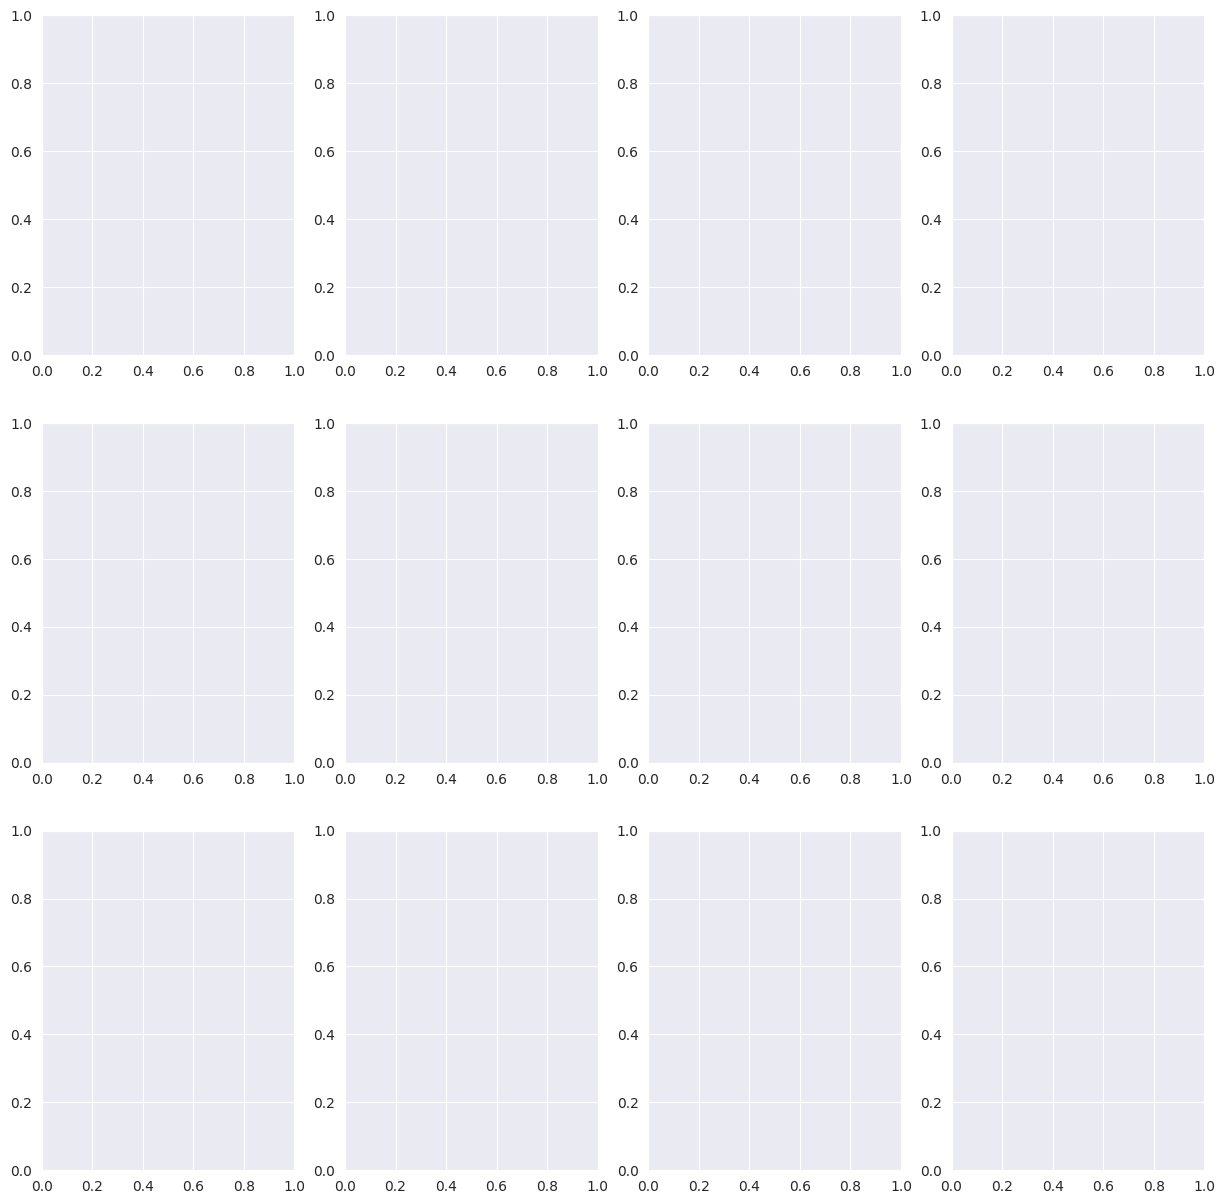

In [ ]:
# define the directory where the custom images are stored
custom_image_dir = '/content/Emergency-Response-3/valid/images'

# get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# select 12 random images from the list
selected_images = random.sample(image_files, 12)

# create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

# iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = smoke_detect(img_path)

     # plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


image 1/1 /content/Emergency-Response-3/test/images/1_mp4-0072_jpg.rf.2c35e7d1e59f6537e9fa2599b5b8412a.jpg: 640x640 1 injured, 1 people, 2 vehicless, 19.1ms
Speed: 2.1ms preprocess, 19.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


array([[[32, 40, 40],
        [27, 35, 35],
        [39, 47, 47],
        ...,
        [ 4,  9, 10],
        [ 5, 10, 11],
        [ 5, 10, 11]],

       [[32, 40, 40],
        [25, 33, 33],
        [34, 42, 42],
        ...,
        [ 4,  9, 10],
        [ 5, 10, 11],
        [ 5, 10, 11]],

       [[36, 44, 44],
        [28, 36, 36],
        [33, 41, 41],
        ...,
        [ 4,  9, 10],
        [ 5, 10, 11],
        [ 5, 10, 11]],

       ...,

       [[ 8, 21, 23],
        [10, 23, 25],
        [13, 26, 28],
        ...,
        [32, 73, 82],
        [33, 74, 83],
        [33, 74, 83]],

       [[ 8, 21, 23],
        [10, 23, 25],
        [12, 25, 27],
        ...,
        [33, 74, 83],
        [33, 74, 83],
        [33, 74, 83]],

       [[ 8, 21, 23],
        [10, 23, 25],
        [12, 25, 27],
        ...,
        [33, 74, 83],
        [33, 74, 83],
        [33, 74, 83]]], dtype=uint8)
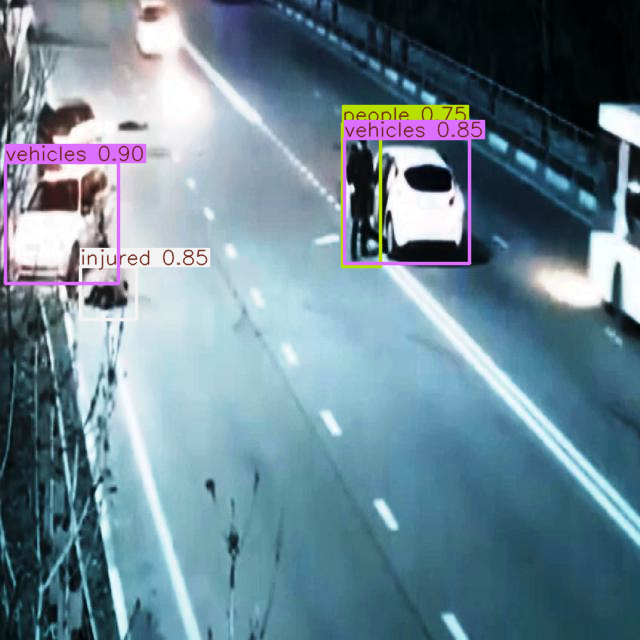

In [ ]:
# path for internal photo
internal_photo_path1 = '/content/Emergency-Response-3/test/images/1_mp4-0072_jpg.rf.2c35e7d1e59f6537e9fa2599b5b8412a.jpg'

# load and predict
results = model(internal_photo_path1)

# visualize
results[0].plot()


image 1/1 /content/Emergency-Response-3/test/images/CarFiresVed_mp4-0130_jpg.rf.3c2cfc3a765451a3a3c99af2443618c5.jpg: 640x640 1 fire, 1 people, 1 smoke, 1 vehicles, 15.9ms
Speed: 6.5ms preprocess, 15.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


array([[[250, 250, 250],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [165, 156, 152],
        [163, 154, 150],
        [162, 153, 149]],

       [[251, 251, 251],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [171, 162, 158],
        [174, 165, 161],
        [177, 168, 164]],

       [[251, 251, 251],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [187, 178, 174],
        [191, 182, 178],
        [193, 184, 180]],

       ...,

       [[117, 137, 154],
        [109, 129, 146],
        [112, 132, 149],
        ...,
        [ 97, 116, 131],
        [ 92, 111, 126],
        [ 91, 110, 125]],

       [[120, 140, 157],
        [110, 130, 147],
        [113, 133, 150],
        ...,
        [ 96, 117, 132],
        [ 95, 114, 129],
        [ 91, 110, 125]],

       [[127, 147, 164],
        [115, 135, 152],
        [116, 136, 153],
        ...,
        [ 92, 113, 128],
        [ 96, 115, 130],
        [ 93, 112, 127]]], dtype=uint8)
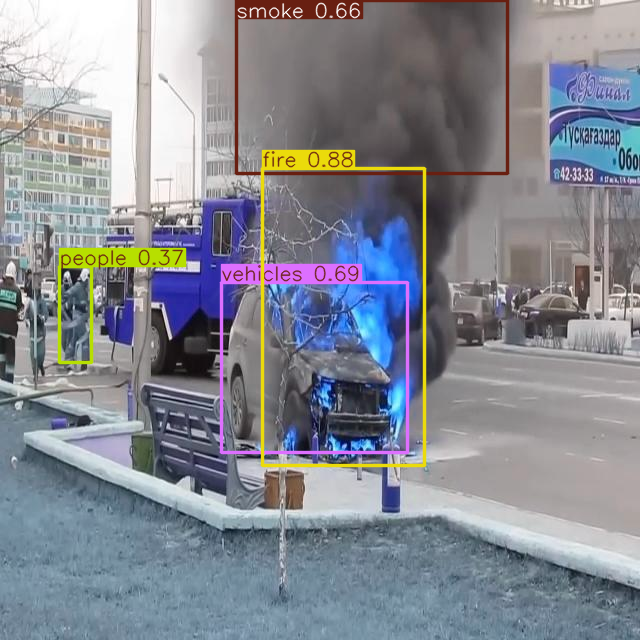

In [ ]:
# path for internal photo
internal_photo_path2 = '/content/Emergency-Response-3/test/images/CarFiresVed_mp4-0130_jpg.rf.3c2cfc3a765451a3a3c99af2443618c5.jpg'

# load and predict
results = model(internal_photo_path2)

# visualize
results[0].plot()


image 1/1 /content/Emergency-Response-3/test/images/Recording-2024-09-18-134002_mp4-0090_jpg.rf.c69343ef41ddf9921bcb0cb7c987efe2.jpg: 640x640 1 accident, 1 injured, 5 peoples, 2 vehicless, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


array([[[253, 252, 255],
        [236, 236, 242],
        [248, 246, 252],
        ...,
        [247, 249, 249],
        [244, 247, 245],
        [249, 252, 250]],

       [[247, 243, 248],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [249, 255, 254],
        [250, 255, 254],
        [248, 255, 252]],

       [[241, 232, 229],
        [255, 255, 251],
        [217, 206, 202],
        ...,
        [237, 251, 249],
        [244, 255, 254],
        [241, 255, 251]],

       ...,

       [[172, 181, 160],
        [174, 186, 164],
        [199, 211, 189],
        ...,
        [148, 212, 183],
        [142, 210, 175],
        [130, 201, 161]],

       [[126, 190, 118],
        [103, 169,  97],
        [140, 206, 134],
        ...,
        [145, 226, 157],
        [150, 233, 158],
        [166, 253, 173]],

       [[120, 213, 116],
        [ 67, 160,  63],
        [ 89, 184,  87],
        ...,
        [119, 209, 119],
        [137, 230, 133],
        [182, 255, 175]]], dtype=uint8)
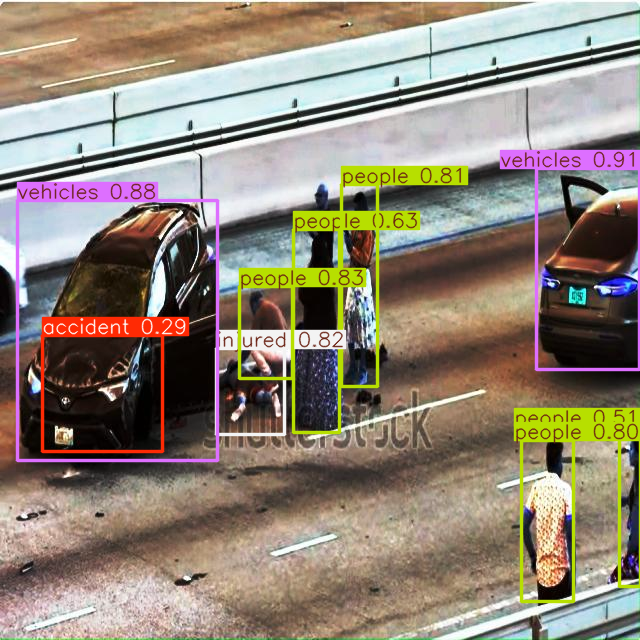

In [ ]:
# path for internal photo
internal_photo_path3 = '/content/Emergency-Response-3/test/images/Recording-2024-09-18-134002_mp4-0090_jpg.rf.c69343ef41ddf9921bcb0cb7c987efe2.jpg'

# load and predict
results = model(internal_photo_path3)

# visualize
results[0].plot()

In [ ]:
# path for internal photo
external_photo_path1 = '/content/burning-car-fire-white-passenger-600nw-2313756465.jpg.webp'

# load and predict
results = model(external_photo_path1)

# visualize
results[0].plot()

In [ ]:
# list the contents of the directory where the model weights should be
output_dir = '/content/runs/detect/train/weights'
print("Contents of the weights directory:", os.listdir(output_dir))

Contents of the weights directory: ['last.pt', 'best.pt']


The main loop processes each frame of the video, detecting objects using the YOLO model and drawing bounding boxes around them. Here’s a brief overview of the steps involved:

* Read Frame: Each frame is read sequentially from the video.
* Skip Frames: Every second frame is processed to reduce computational load.
* Detection: The YOLO model detects objects in the current frame.
* Bounding Boxes: Detected objects are marked with bounding boxes and labels indicating their class and confidence scores.
* Masks Processing: If available, masks are processed for additional analysis (like fire detection).
* Output Video: The processed frames can be written to an output video file.

# YOLO 8 Fine tunning


* sns.set_style('darkgrid'): Sets the style of seaborn plots to have a dark grid background for better visibility.
* %matplotlib inline: A magic command to display Matplotlib plots inline within a Jupyter notebook.

In [ ]:
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
# import suppresses warnings related to deprecated features, making the output cleaner
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

Loads a pre-trained YOLO model (version 8) from a specified file. This model can detect objects in images.

In [ ]:
# load the pre-trained YOLO model
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


Connects to the Roboflow API using an API key, accesses a specific workspace and project, retrieves a specific version of the dataset, and downloads it in the YOLO format.

In [ ]:
rf = Roboflow(api_key="AV9dOXoKKeH8bfeebg1g")
project = rf.workspace("t5-capstone").project("emergency-response-pjufk")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Emergency-Response-4 in yolov8:: 100%|██████████| 14608/14608 [00:02<00:00, 5780.31it/s]


In [ ]:
# Sets the path to the downloaded dataset
dataset_path = "/content/Emergency-Response-4"

Listing all files in the dataset directory and prints them. This helps verify that the dataset has been downloaded correctly.

In [ ]:
# listing all files in the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['test', 'data.yaml', 'train', 'README.roboflow.txt', 'README.dataset.txt', 'valid']


This section checks for an annotations CSV file in the dataset path. If it exists, it reads the file into a DataFrame and prints the first few rows. This is useful for understanding the dataset's structure.

Lists the contents of the directories, checking if they exist first. This helps ensure that the dataset is organized correctly.

In [ ]:
# print("Contents of the train directory:", os.listdir(train_path) if os.path.exists(train_path) else "Train directory does not exist.")
# print("Contents of the test directory:", os.listdir(test_path) if os.path.exists(test_path) else "TEst directory does not exist.")
# print("Contents of the valid directory:", os.listdir(valid_path) if os.path.exists(valid_path) else "Validation directory does not exist.")

Seting paths for the images and labels of the training, testing, and validation datasets. The paths are used for loading images and their corresponding labels during processing

In [ ]:
train_images = os.path.join(dataset_path, 'train', 'images')
train_labels = os.path.join(dataset_path, 'train', 'labels')

test_images = os.path.join(dataset_path, 'test', 'images')
test_labels = os.path.join(dataset_path, 'test', 'labels')

valid_images = os.path.join(dataset_path, 'valid', 'images')
val_labels = os.path.join(dataset_path, 'valid', 'labels')

In [ ]:
# initializes counters to keep track of the number of images in the datasets
num_train_images = 0
num_test_images = 0
num_valid_images = 0

# initializes sets to store unique image dimensions for datasets
# This can be useful for analyzing the dataset's diversity in terms of image sizes
train_image_sizes = set()
test_image_sizes = set()
valid_image_sizes = set()


# iterates through the images directory, counts the number of JPEG images, and adds their dimensions to the each set

# train
for filename in os.listdir(train_images):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# test
for filename in os.listdir(test_images):
    if filename.endswith('.jpg'):
        num_test_images += 1
        image_path = os.path.join(test_images, filename)
        with Image.open(image_path) as img:
            test_image_sizes.add(img.size)

# validation
for filename in os.listdir(valid_images):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# print the total counts of images
print(f"Number of training images: {num_train_images}")
print(f"Number of testing images: {num_test_images}")
print(f"Number of validation images: {num_valid_images}")


Number of training images: 5127
Number of testing images: 722
Number of validation images: 1449


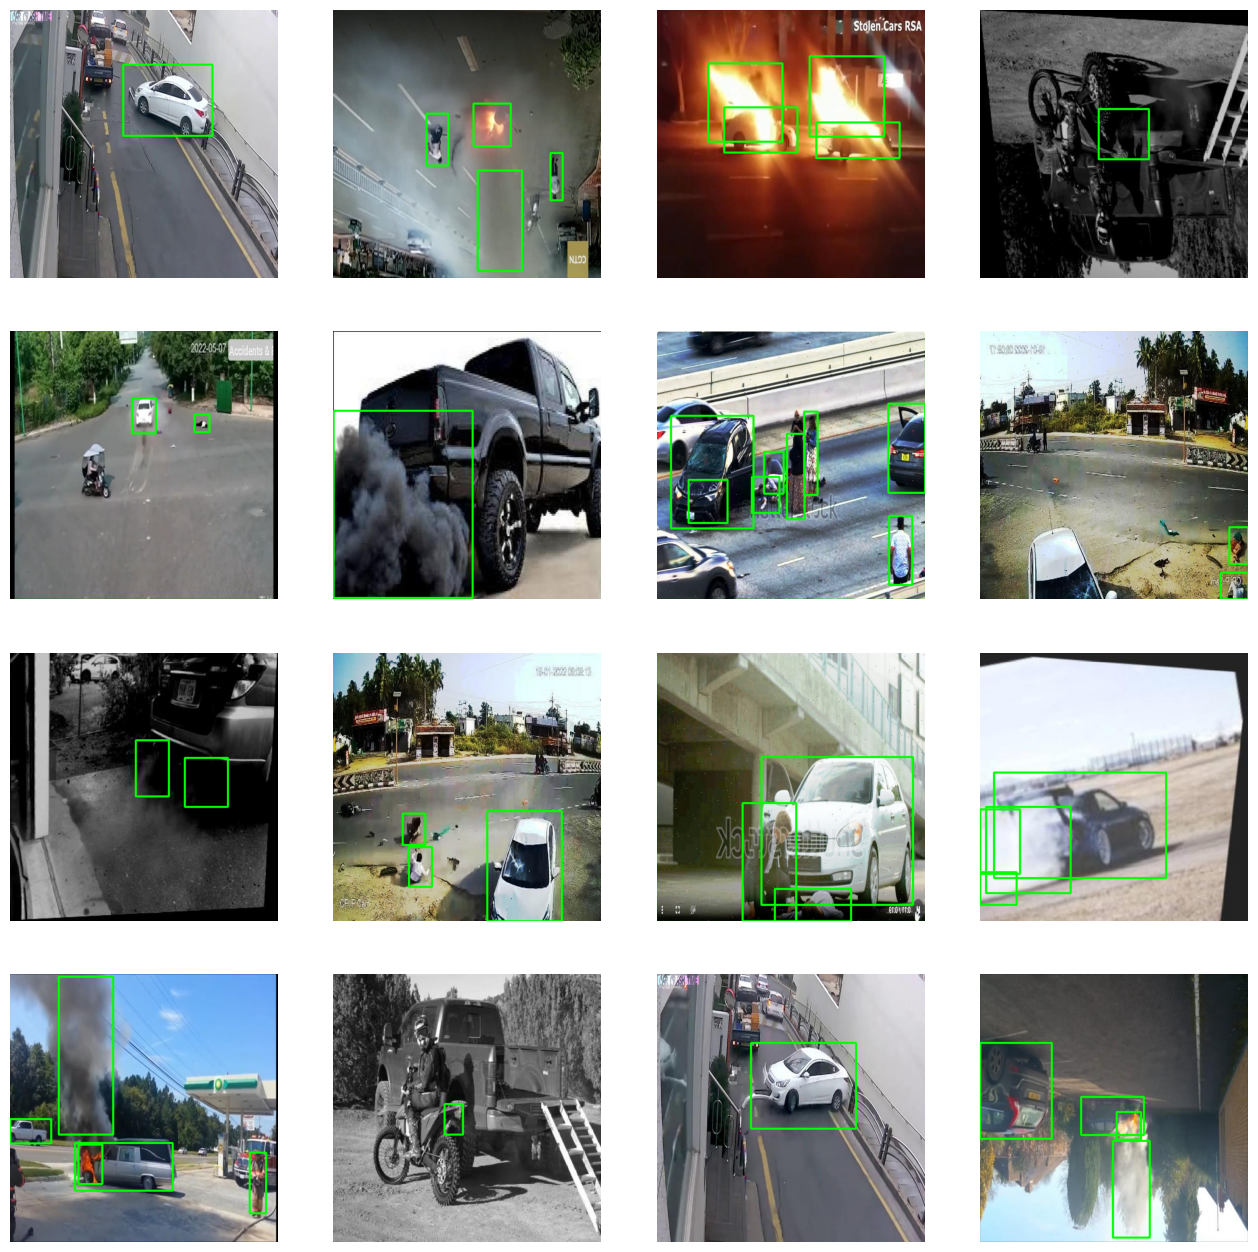

In [ ]:
# retrieves a list of all image files in the training images directory for further processing
image_files = os.listdir(train_images)

# randomly selects 16 images from the training set for visualization
# helping to inspect the dataset
random_images = random.sample(image_files, 16)

# creates a 4x4 grid of subplots to display the randomly selected images
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# loop through the randomly selected images
# calculating the row and column indices for the subplot grid
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # load each image using OpenCV
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # constructs the path to the corresponding label file, reads it, and splits the labels into a list
    # each label typically contains information about detected objects in the image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # for each label, it checks if it has the correct number of components (5).
    # if so, it extracts the class ID and bounding box parameters (center coordinates, width, height)
    # then converts them to pixel coordinates, and draws a rectangle around the detected object using OpenCV
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # converts the image from BGR to RGB format (since OpenCV uses BGR)
    # displays it in the appropriate subplot, and turns off the axis for a cleaner look
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

# renders the plots with the images and their detected objects
plt.show()

Load a specific image, resizes it to 512x512 pixels, checks if the image was loaded successfully, and prints its dimensions

In [ ]:
# # load an image using OpenCV
# image = cv2.imread("/content/Emergency-Response-3/train/images/041013autogas-1_jpg.rf.87e7b1cba2efaa07f4c512c67ce7ccec.jpg")
# image = cv2.resize(image, (512, 512))
# if image is None:
#     print(f"Failed to load image at path: {image_path}")
# else:
#     height, width, channels = image.shape
#     print(f"The image has dimensions {width}x{height} and {channels} channels.")


The image has dimensions 512x512 and 3 channels.


Trains the YOLO model using the specified dataset configuration file (data.yaml) for 15 epochs, with images resized to 640 pixels, setting a random seed for reproducibility, a batch size of 32, and using 4 worker threads for data loading.

In [ ]:
# New data to be added
new_data = {
    'test': '/content/Emergency-Response-4/test',
    'train': '/content/Emergency-Response-4/train',
    'val': '/content/Emergency-Response-4/valid'
}

# YAML file path
yaml_file = '/content/Emergency-Response-4/data.yaml'

# existing data
existing_data = {}

# Check if the file exists
if os.path.exists(yaml_file):
    # Read the existing data
    with open(yaml_file, 'r') as file:
        existing_data = yaml.safe_load(file) or {}

# Update the existing data with new data
existing_data.update(new_data)

# Write the updated data back to the YAML file
with open(yaml_file, 'w') as file:
    yaml.dump(existing_data, file, default_flow_style=False)

print("Data has been written to 'data.yaml'")


Data has been written to 'data.yaml'


In [ ]:
# training the model
model.train(data = yaml_file,
            epochs = 30,
            seed = 42,
            batch = 32,
            workers = 4)

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Emergency-Response-4/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.9MB/s]

WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

AMP: checks passed ✅


train: Scanning /content/Emergency-Response-4/train/labels... 5127 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5127/5127 [00:02<00:00, 1949.34it/s]


train: New cache created: /content/Emergency-Response-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 136, len(boxes) = 13518. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Emergency-Response-4/valid/labels... 1449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1449/1449 [00:02<00:00, 556.33it/s]


val: New cache created: /content/Emergency-Response-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2424. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       4.8G      1.609      3.096      1.622         24        640: 100%|██████████| 161/161 [01:41<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:15<00:00,  1.50it/s]


                   all       1449       2424      0.601      0.395       0.39       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.29G      1.557      2.033      1.547         41        640: 100%|██████████| 161/161 [01:36<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:15<00:00,  1.49it/s]


                   all       1449       2424      0.539      0.467      0.497      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.29G      1.523      1.789      1.525         43        640: 100%|██████████| 161/161 [01:39<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]


                   all       1449       2424      0.593      0.545       0.56        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.29G      1.501      1.623      1.501         27        640: 100%|██████████| 161/161 [01:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]


                   all       1449       2424      0.663      0.591      0.622      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.27G      1.458       1.48      1.464         17        640: 100%|██████████| 161/161 [01:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.58it/s]


                   all       1449       2424      0.677      0.653      0.652      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.28G      1.412      1.376      1.426         25        640: 100%|██████████| 161/161 [01:37<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]


                   all       1449       2424      0.691      0.645      0.658      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.28G      1.387      1.308      1.411         25        640: 100%|██████████| 161/161 [01:35<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.79it/s]

                   all       1449       2424      0.707      0.638      0.676      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.29G      1.362      1.239      1.391         40        640: 100%|██████████| 161/161 [01:33<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]

                   all       1449       2424      0.755      0.689      0.766      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.28G      1.338      1.207      1.376         33        640: 100%|██████████| 161/161 [01:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.59it/s]

                   all       1449       2424      0.782        0.7      0.757      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.29G      1.323      1.167      1.363         28        640: 100%|██████████| 161/161 [01:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.61it/s]

                   all       1449       2424      0.796       0.71      0.785      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.27G      1.305      1.133      1.352         21        640: 100%|██████████| 161/161 [01:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.74it/s]

                   all       1449       2424      0.794      0.747      0.808      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.24G      1.287      1.112      1.338         25        640: 100%|██████████| 161/161 [01:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.78it/s]

                   all       1449       2424      0.773      0.767      0.794      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.28G      1.261      1.068       1.32         54        640: 100%|██████████| 161/161 [01:35<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

                   all       1449       2424      0.825      0.751      0.804      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.29G       1.25      1.045      1.313         26        640: 100%|██████████| 161/161 [01:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


                   all       1449       2424      0.798      0.735      0.808      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.27G      1.236      1.023      1.298         27        640: 100%|██████████| 161/161 [01:33<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]

                   all       1449       2424      0.796      0.798      0.829      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.24G      1.224      1.005      1.295         27        640: 100%|██████████| 161/161 [01:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]

                   all       1449       2424        0.8      0.792      0.839      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.28G        1.2      0.969      1.276         53        640: 100%|██████████| 161/161 [01:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.71it/s]

                   all       1449       2424      0.848       0.79      0.848      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.28G      1.193     0.9485       1.27         33        640: 100%|██████████| 161/161 [01:32<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]

                   all       1449       2424      0.806      0.815      0.848      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.28G      1.191     0.9475      1.264         35        640: 100%|██████████| 161/161 [01:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.64it/s]

                   all       1449       2424      0.847      0.825       0.86      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.28G      1.186     0.9319       1.26         16        640: 100%|██████████| 161/161 [01:36<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]

                   all       1449       2424      0.813      0.832      0.851      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       4.4G      1.159     0.8314      1.272         18        640: 100%|██████████| 161/161 [01:32<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]

                   all       1449       2424      0.845      0.819      0.872      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.23G      1.135     0.7929      1.254         13        640: 100%|██████████| 161/161 [01:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.89it/s]

                   all       1449       2424      0.836      0.822      0.873       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.22G      1.115     0.7718      1.238         11        640: 100%|██████████| 161/161 [01:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]

                   all       1449       2424      0.875      0.816      0.878       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.23G      1.104     0.7529      1.233         19        640: 100%|██████████| 161/161 [01:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.86it/s]

                   all       1449       2424      0.872      0.825      0.887      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.22G      1.081     0.7352      1.217         20        640: 100%|██████████| 161/161 [01:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]

                   all       1449       2424      0.879      0.817      0.892      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.23G      1.072     0.7223      1.209         11        640: 100%|██████████| 161/161 [01:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.63it/s]

                   all       1449       2424      0.846      0.858      0.896      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.22G      1.051     0.7061      1.195         23        640: 100%|██████████| 161/161 [01:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]

                   all       1449       2424       0.87      0.846      0.899      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.24G      1.037     0.6895      1.187         23        640: 100%|██████████| 161/161 [01:28<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]

                   all       1449       2424      0.876      0.851      0.903      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.22G      1.025     0.6805      1.183         14        640: 100%|██████████| 161/161 [01:29<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]

                   all       1449       2424      0.889      0.841      0.906      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.23G      1.008     0.6729      1.171         25        640: 100%|██████████| 161/161 [01:28<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:12<00:00,  1.80it/s]

                   all       1449       2424      0.896      0.837      0.903      0.597



30 epochs completed in 0.897 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,538 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:16<00:00,  1.39it/s]


                   all       1449       2424      0.889      0.842      0.906      0.598
              accident        216        236      0.869       0.75      0.906      0.517
                  fire        105        137      0.956      0.949       0.98      0.654
               injured        170        192       0.98      0.964       0.98      0.759
                people        121        266      0.867      0.906       0.92      0.582
                 smoke        994       1159       0.84      0.634      0.759      0.405
              vehicles        352        434      0.819      0.852      0.891      0.669
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5403a18a30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
model.save('detection_model.pt')

In [ ]:
# load cached label data from a NumPy file to ensure it is freshly accessed for further processing
data = np.load('/content/Emergency-Response-4/train/labels.cache', allow_pickle=True).item()

# extracts the labels from the loaded data, which contain information about the images and their corresponding bounding boxes
labels = data['labels']

# iterates through each entry in the labels and appends relevant information to a list
# including image file names, shapes, classes, bounding boxes, normalization status, and bounding box format.
extracted_data = []

for entry in labels:
    extracted_data.append({
        'im_file': entry['im_file'],
        'shape': entry['shape'],
        'class': entry['cls'].flatten().tolist(),  # flattening in case there are multiple classes
        'bboxes': entry['bboxes'].tolist(),  # convert to list for easier handling
        'normalized': entry['normalized'],
        'bbox_format': entry['bbox_format']
    })

# converts the list of extracted data into a Pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(extracted_data)

# prints the first few rows of the DataFrame to check its structure and contents
print(df.head())

                                             im_file       shape  class  \
0  /content/Emergency-Response-4/train/images/041...  (640, 640)  [4.0]   
1  /content/Emergency-Response-4/train/images/041...  (640, 640)  [4.0]   
2  /content/Emergency-Response-4/train/images/041...  (640, 640)  [4.0]   
3  /content/Emergency-Response-4/train/images/041...  (640, 640)  [4.0]   
4  /content/Emergency-Response-4/train/images/041...  (640, 640)  [4.0]   

                                              bboxes  normalized bbox_format  
0  [[0.64453125, 0.4000000059604645, 0.4828124940...        True        xywh  
1  [[0.39453125, 0.3453125059604645, 0.4734374880...        True        xywh  
2  [[0.39765626192092896, 0.359375, 0.52656251192...        True        xywh  
3  [[0.47578126192092896, 0.663281261920929, 0.47...        True        xywh  
4  [[0.58203125, 0.64453125, 0.4828124940395355, ...        True        xywh  


# Testing


In [ ]:
# load the best-trained YOLO model
model = YOLO('/content/detection_model.pt')

In [ ]:
# defines the path to the video file that will be analyzed.
video_path = '/content/Fired_car.mp4'

# sets up parameters for text annotations that will be overlaid on video frames
# including font type, size, position, and colors
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
text_position = (40, 80)
font_color = (255, 255, 255)    # white color for text
background_color = (0, 0, 255)  # red background for text

# initializes a deque (double-ended queue) to keep track of the last 10 accident percentages
# which can be useful for smoothing or averaging
accident_deque = deque(maxlen=10)

# opens the video file for processing
cap = cv2.VideoCapture(video_path)

# checks if the video was opened successfully;
# if not, it prints an error message and exits the program
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# set up a video writer to save the processed video.
# define the codec for output video and retrieves the width and height of the frames from the input video
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
width = int(cap.get(3))
height = int(cap.get(4))
out = cv2.VideoWriter('model_video12.mp4', fourcc, 20.0, (width, height))

# initializes a frame counter
frame_counter = 0

# initializes an empty set for class_id
# which will be used to track unique class IDs detected in the video frames
# class_id = set()
class_names = {0: "accident", 1: "fire", 2: "injured", 3: "people", 4: "smoke", 5: "vehicles"}

# enters a loop to process video frames until the video ends
while cap.isOpened():
    ret, frame = cap.read()  # reads a frame from the video
    if not ret:
        print("Failed to read frame")  # if reading fails, it prints an error message and exits the loop
        break

    frame_counter += 1  # increments the frame counter for each processed frame

    # skip processing for every other frame to reduce computational load
    # effectively processing every second frame
    # if frame_counter % 2 != 0: # skip processing for every 2 frames
    #     continue  # skip to the next iteration of the loop

    # print a message indicating that a frame is being processed
    # which can help with debugging
    print("Processing frame...")

    # passes the current frame through the YOLO model to perform object detection, storing the results
    results = model(frame)

    # initializes a set to store detected vehicle IDs for the current frame
    current_class_id = set()
    class_id = set()

    # iterate through the detection results,
    # extracting bounding box coordinates, confidence scores, and class IDs for each detected object
    for result in results:
      for detection in result.boxes.data:  # Iterate through boxes
        x1, y1, x2, y2, conf, cls = detection.tolist()

        # applies a confidence threshold to filter out detections that are not sufficiently confident (below 0.7)
        # if the confidence is too low, it skips to the next detection.
        if conf < 0.5:
            continue

        # treats the class ID as a unique vehicle ID for tracking purposes
        vehicle_id = int(cls)

        # add the detected vehicle ID to the set for the current frame
        # allowing for tracking across frames
        current_class_id.add(vehicle_id)

        # draws a bounding box around the detected object on the current frame using OpenCV
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # format the label for the detected object based on its ID and confidence score
        # preparing it for display
        # if vehicle_id == 0:
        #     label = f"Smoke, Conf: {conf:.2f}"
        # elif vehicle_id == 1:
        #     label = f"Car, Conf: {conf:.2f}"
        # elif vehicle_id == 2:
        #     label = f"Accident, Conf: {conf:.2f}"
        # else:
        #     label = f"ID: {vehicle_id}, Conf: {conf:.2f}"


        # format the label for the detected object based on its ID and confidence score
        label = f"{class_names[int(cls)]}, Conf: {conf:.2f}"

        # place the formatted label above the bounding box on the frame using OpenCV
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # update the overall set of class IDs with the IDs detected in the current frame
        # allowing for tracking across multiple frames
        class_id.update(current_class_id)

    # check if the detection results include masks (in case of segmentation tasks)
    # if masks are present, it initializes a total area counter and calculates the total area of the current frame
    # it then processes each mask to create a binary representation, where the mask is converted to a binary image
    if results and results[0].masks is not None:
        total_area = 0
        masks = results[0].masks.data.cpu().numpy()
        image_area = frame.shape[0] * frame.shape[1]
        for mask in masks:
            binary_mask = (mask > 0).astype(np.uint8) * 255   # Converts the mask into a binary format where the mask values greater than zero are set to 255 (white), and others are set to 0 (black)
            contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            if contours:  # ensure contours are found
                total_area += cv2.contourArea(contours[0])

        percentage_accident = (total_area / image_area) * 100
    else:
        percentage_accident = 0  # no masks found

    # write the processed frame to the output video
    out.write(frame)

    # showing the frame
    # cv2_imshow(frame)

    # breaking the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release() # releases the video capture object, freeing up resources
out.release() # closes the video writer object, ensuring that the output file is properly saved
cv2.destroyAllWindows() # is a cleanup function that closes all OpenCV windows

# display a message indicating completion
print("Video processing complete")

Processing frame...

0: 384x640 1 fire, 1 vehicles, 14.3ms
Speed: 2.5ms preprocess, 14.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 1 vehicles, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 1 vehicles, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 1 vehicles, 8.3ms
Speed: 2.3ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 1 vehicles, 10.7ms
Speed: 4.4ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 1 fire, 1 vehicles, 8.0ms
Speed: 2.1ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Processing frame...

0: 384x640 2 fires, 1 vehicles, 8.6ms
Speed: 2.2ms preprocess, 8.6ms inference, 1

In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'accident', 1: 'fire', 2: 'injured', 3: 'people', 4: 'smoke', 5: 'vehicles'}
 obb: None
 orig_img: array([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [

In [ ]:
for result in results:
    boxes = result.boxes
    print(boxes)

# for class_id in boxes.cls:  # Iterate over the class IDs in boxes.cls
#     class_id = int(class_id)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 0., 5., 0.], device='cuda:0')
conf: tensor([0.8085, 0.6604, 0.5604, 0.2550], device='cuda:0')
data: tensor([[5.8679e+02, 1.4698e+02, 6.3017e+02, 1.8458e+02, 8.0853e-01, 2.0000e+00],
        [3.3244e+02, 1.6972e+02, 4.5358e+02, 3.4054e+02, 6.6035e-01, 0.0000e+00],
        [3.9274e+02, 1.1722e+02, 4.6029e+02, 1.8546e+02, 5.6037e-01, 5.0000e+00],
        [3.4077e+02, 2.0654e+02, 4.4622e+02, 3.2169e+02, 2.5502e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (480, 848)
shape: torch.Size([4, 6])
xywh: tensor([[608.4800, 165.7802,  43.3820,  37.5985],
        [393.0068, 255.1326, 121.1430, 170.8195],
        [426.5145, 151.3413,  67.5484,  68.2393],
        [393.4943, 264.1175, 105.4572, 115.1543]], device='cuda:0')
xywhn: tensor([[0.7175, 0.3454, 0.0512, 0.0783],
        [0.4635, 0.5315, 0.1429, 0.3559],
        [0.5030, 0.3153, 0.0797, 0.1422],
        [0.4640, 0.5502, 0.1244, 0.2399]], devic

# Location

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

In [ ]:

# Generate Random Traffic Data
np.random.seed(42)
num_points = 500  # Number of data points

# Simulate coordinates around a central location (e.g., a city center)
latitudes = np.random.uniform(24.65, 24.75, num_points)
longitudes = np.random.uniform(46.65, 46.75, num_points)

# Simulate traffic density (scale 10 to 100)
traffic_density = np.random.uniform(10, 100, num_points)

# Simulate time of day (0 to 23 hours)
timestamps = np.random.randint(0, 24, num_points)

# Create DataFrame
traffic_data = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'traffic_density': traffic_density,
    'hour_of_day': timestamps
})

# Display first few rows
traffic_data.head()

latitude  longitude  traffic_density  hour_of_day
0  24.687454  46.719816        26.661964           15
1  24.745071  46.703610        58.771085            1
2  24.723199  46.680953        88.565125            5
3  24.709866  46.731380        75.900240           20
4  24.665602  46.718473        82.590503           11

In [ ]:
#Create a Folium Map

center_location = [traffic_data['latitude'].mean(), traffic_data['longitude'].mean()]
traffic_map = folium.Map(location=center_location, zoom_start=13)
#Add Traffic Points to the Map

for idx, row in traffic_data.iterrows():
  folium.CircleMarker(location=(row['latitude'], row['longitude']), radius=row['traffic_density'] / 20, # Scale marker size
                      color='red' if row['traffic_density'] > 70 else 'green', fill=True, fill_opacity=0.6 ).add_to(traffic_map)
#Display the Map

traffic_map

# Image Captioning

In [ ]:
import cv2
import os
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Paths and folder setup
video_path = '/content/model_video12.mp4'  # Path to the input video
output_frames_folder = '/content/frames/'  # Path to save extracted frames
captions_file = 'video_captions6.txt'  # File to save captions
video_description_file = 'video_description6.txt'  # File to save final video description

In [ ]:
# Step 1: Create the folder to save frames if it doesn't exist
if not os.path.exists(output_frames_folder):
    os.makedirs(output_frames_folder)
    print(f"Folder created at {output_frames_folder}")
else:
    print(f"Folder already exists at {output_frames_folder}")

# Function to extract frames from video
def extract_frames(video_path, output_folder, frame_interval=30):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    success, image = cap.read()

    if not cap.isOpened():
        print("Error: Cannot open the video file.")
        return
    if not success:
        print(f"Error: Unable to read video file {video_path}")
        return

    print("Starting frame extraction...")
    while success:
        if frame_count % frame_interval == 0:  # Save every 'frame_interval' frames
            frame_name = f"frame_{frame_count}.jpg"
            frame_path = os.path.join(output_folder, frame_name)
            cv2.imwrite(frame_path, image)
            print(f"Frame saved at: {frame_path}")
        success, image = cap.read()
        frame_count += 1

    cap.release()
    print("Frame extraction completed.")

Folder already exists at /content/frames/


In [ ]:
# Step 2: Extract frames from the video
extract_frames(video_path, output_frames_folder)

# Check if frames are actually saved
if os.listdir(output_frames_folder):
    print(f"Frames successfully saved in {output_frames_folder}")
else:
    print(f"No frames were saved in {output_frames_folder}. Please check if the video path is correct and if frames were extracted.")

Starting frame extraction...
Frame saved at: /content/frames/frame_0.jpg
Frame saved at: /content/frames/frame_30.jpg
Frame saved at: /content/frames/frame_60.jpg
Frame saved at: /content/frames/frame_90.jpg
Frame saved at: /content/frames/frame_120.jpg
Frame saved at: /content/frames/frame_150.jpg
Frame saved at: /content/frames/frame_180.jpg
Frame saved at: /content/frames/frame_210.jpg
Frame saved at: /content/frames/frame_240.jpg
Frame saved at: /content/frames/frame_270.jpg
Frame extraction completed.
Frames successfully saved in /content/frames/


In [ ]:
# Step 3: Load BLIP model for real caption generation
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884


In [ ]:
# Step 4: Generate captions for each frame using BLIP
captions = []
for frame in os.listdir(output_frames_folder):
    if frame.endswith(('.jpg', '.jpeg', '.png')):  # Check for image formats
        frame_path = os.path.join(output_frames_folder, frame)

        # Open the frame and process it for the captioning model
        image = Image.open(frame_path)
        inputs = processor(images=image, return_tensors="pt").to(device)

        # Generate the caption
        caption_ids = model.generate(**inputs)
        caption = processor.decode(caption_ids[0], skip_special_tokens=True)

        # Store the caption with the frame name
        captions.append(f"{frame}: {caption}")
        print(f"Generated caption for {frame}: {caption}")

# Save captions to a text file
with open(captions_file, 'w') as f:
    for caption in captions:
        f.write(caption + '\n')
print(f"Captions saved to {captions_file}")

Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.


Generated caption for frame_180.jpg: a car is on fire in the street
Generated caption for frame_240.jpg: a car is on fire in the street
Generated caption for frame_270.jpg: a car is on fire in the street
Generated caption for frame_60.jpg: a car is on fire in the street
Generated caption for frame_120.jpg: a car is on fire in the street
Generated caption for frame_30.jpg: a car is on fire in the street
Generated caption for frame_90.jpg: a car is on fire in the street
Generated caption for frame_0.jpg: a car is on fire in the street
Generated caption for frame_150.jpg: a car is on fire in the street
Generated caption for frame_210.jpg: a car is on fire in the street
Captions saved to video_captions6.txt


In [ ]:
# Step 5: Generate a single-line video description based on all captions
# Collect unique captions in a set
unique_captions = set()

for caption in captions:
    description = caption.split(": ")[1]
    unique_captions.add(description)

# Join the unique captions with commas
video_description = "This video depicts: " + ', '.join(unique_captions)

# Save the video description to a text file
with open(video_description_file, 'w') as f:
    f.write(f"Video Description: {video_description}\n")
print(f"Video description saved to {video_description_file}")

# Check the contents of the description file
with open(video_description_file, 'r') as f:
    description = f.read()
print(description)


Video description saved to video_description6.txt
Video Description: This video depicts: a car is on fire in the street



# LLM

In [ ]:
#dictionary to store number of vehicles, people, and injured people
class_counts = {'vehicles': 0, 'people': 0, 'injured': 0}

#flags for accident, fire, and smoke detection
detections = {'accident': False, 'fire': False, 'smoke': False}

for result in results:
    if result.boxes.cls is not None:  # Check if any objects were detected
        for *xyxy, conf, cls in result.boxes.data.tolist():  # Iterate through detected objects
            class_id = int(cls)
            class_name = class_names.get(class_id)

            # Counting vehicles, people, and injured people if confidence >= 0.25
            if class_name in ['vehicles','injured','people'] and conf >= 0.25:
                class_counts[class_name] += 1

            # Set flags to True if accident, fire, or smoke are detected
            if class_name == 'accident' and conf >= 0.25:
                detections['accident'] = True
            elif class_name == 'fire' and conf >= 0.25:
                detections['fire'] = True
            elif class_name == 'smoke' and conf >= 0.25:
                detections['smoke'] = True

# Print out the count for vehicles, people, and injured people
print("Class Counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Print the detection status for accident, fire, and smoke
print("\nDetection Status:")
for detection, status in detections.items():
    print(f"{detection}: {'Detected' if status else 'Not Detected'}")


Class Counts:
vehicles: 1
people: 0
injured: 0

Detection Status:
accident: Not Detected
fire: Detected
smoke: Not Detected


In [ ]:
!pip install langchain

In [ ]:
! pip install langchain_community unstructured sentence_transformers tiktoken chromadb langchain_chroma langchain_groq

In [ ]:
# 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
# class_names = {0: "accident", 1: "fire", 2: "injured", 3: "people", 4: "smoke", 5: "vehicles"}

In [ ]:
# dictionary to store the YOLO output including class counts and detections
yolo_output = {}

# assign class_counts to yolo_output
yolo_output['class_counts'] = class_counts

# assign detection flags (for accident, fire, smoke) to yolo_output
yolo_output['detections'] = detections

# Print the YOLO output to verify
print("YOLO Output:")
print(yolo_output)


YOLO Output:
{'class_counts': {'vehicles': 1, 'people': 0, 'injured': 0}, 'detections': {'accident': False, 'fire': True, 'smoke': False}}


In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq
#from langchain.llms import OpenAI

# Define the prompt template for generating the report
prompt_template = f"""
You are a 911 agent in the control and command center. Instead of following the CCTVs by yourself, the YOLO model detected incidents with the following information:

- Caption: {description}
- YOLO Output:
  - Vehicles: {yolo_output['class_counts']['vehicles']}
  - People: {yolo_output['class_counts']['people']}
  - Injured: {yolo_output['class_counts']['injured']}
  - Accident Detected: {'Yes' if yolo_output['detections']['accident'] else 'No'}
  - Fire Detected: {'Yes' if yolo_output['detections']['fire'] else 'No'}
  - Smoke Detected: {'Yes' if yolo_output['detections']['smoke'] else 'No'}

Based on this information, generate a detailed report describing the situation and determine what emergencies need to be contacted:

1. If an accident is detected, call Najim.
2. If there are any injured individuals, call for an ambulance.
3. If smoke or fire is detected, call the fire department.
"""

#llama3-8b-8192
# groq/llama-3.1-70b-versatile
# Setup the prompt and LLM chain
groq_api_key = "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"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name="llama3-8b-8192")
prompt = PromptTemplate(template=prompt_template, input_variables=["accident", "fire","injured","smoke","people","vehicles"])
chain = LLMChain(llm=llm, prompt=prompt)

# Example of YOLO output as input for the chain
report = chain.run(yolo_output)
print(report)


The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.


**Incident Report**

**Date:** [Current Date]
**Time:** [Current Time]
**Location:** [Location of the incident]

**Summary:**

A car is on fire in the street, as depicted in the video description. The YOLO model has detected the fire, but no people, injured individuals, or accidents are present.

**Incident Details:**

* Vehicles: 1 (a car on fire)
* People: 0
* Injured: 0
* Accident Detected: No
* Fire Detected: Yes
* Smoke Detected: No

**Emergency Response:**

Based on the information provided, the following emergencies need to be contacted:

* **Fire Department:** Due to the presence of a fire, I am contacting the fire department to respond to the scene and extinguish the flames.

**Additional Notes:**

* No ambulances or accident response teams are required at this time, as there are no injured individuals or accidents detected.
* I will continue to monitor the situation and provide updates as necessary.

**Dispatch Instructions:**

* Dispatch the fire department to the location o

In [ ]:
!pip install crewai langchain langchain-community langchain_groq

In [ ]:
import os

# Save the API key
os.environ["GROQ_API_KEY"] = "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"

In [ ]:
from langchain_groq import ChatGroq

# Create the LLM for writing and editing
llm = ChatGroq(
    model="groq/llama-3.1-70b-versatile",
    temperature=0.7,  # Adjusts creativity
    max_tokens=None,
    timeout=None,
    max_retries=2
)


In [ ]:
from crewai import Task, Agent

# Create agents for each emergency service
najim_agent = Agent(
    llm=llm,
    role="Najim Emergency Response Agent",
    goal="Give updates about the Najim emergency response time.",
    backstory="You are responsible for responding to road accidents.",
    allow_delegation=False,
    verbose=1,  # Enables detailed logging
)

ambulance_agent = Agent(
    llm=llm,
    role="Ambulance Emergency Response Agent",
    goal="Give updates about the ambulance response time for injured individuals.",
    backstory="You are responsible for responding to medical emergencies.",
    allow_delegation=False,
    verbose=1,
)

firefighter_agent = Agent(
    llm=llm,
    role="Firefighter Emergency Response Agent",
    goal="Give updates about the fire department's response time for fire or smoke.",
    backstory="You are responsible for responding to fire and smoke incidents.",
    allow_delegation=False,
    verbose=1,
)

# Task 1: Najim task (if accident is detected)
task_najim = Task(
    description="Provide updates on Najim's response to the accident.",
    expected_output="Time for Najim to arrive at the scene and status of the response.",
    output_file="najim_response.txt",  # Output can be saved to a file
    agent=najim_agent,
)

# Task 2: Ambulance task (if injured people are detected)
task_ambulance = Task(
    description="Provide updates on ambulance response for injured individuals.",
    expected_output="Time for ambulance to arrive and status of injured people.",
    output_file="ambulance_response.txt",  # Output can be saved to a file
    agent=ambulance_agent,
)

# Task 3: Firefighter task (if fire or smoke is detected)
task_firefighter = Task(
    description="Provide updates on the fire department's response to fire or smoke.",
    expected_output="Time for firefighters to arrive and updates on fire or smoke control.",
    output_file="firefighter_response.txt",  # Output can be saved to a file
    agent=firefighter_agent,
)

def handle_tasks_based_on_report(class_counts, detections):
    # Check if accident detected based on detections dictionary
    if detections.get('accident', False):  # If 'accident' is True
        task_najim.agent.execute_task(task_najim)

    # Check if injured people count is greater than 0
    if class_counts.get('injured', 0) > 0:  # If 'injured' count is greater than 0
        task_ambulance.agent.execute_task(task_ambulance)

    # Check if fire or smoke detected based on detections dictionary
    if detections.get('fire', False) or detections.get('smoke', False):  # If 'fire' or 'smoke' is True
        task_firefighter.agent.execute_task(task_firefighter)

# Generate the report using your chain and YOLO output
report = chain.run(yolo_output)
print("Generated Report:\n", report)

# Handle tasks based on the generated report
handle_tasks_based_on_report(class_counts, detections)


# Agent: Firefighter Emergency Response Agent
## Task: Provide updates on the fire department's response to fire or smoke.


# Agent: Firefighter Emergency Response Agent
## Final Answer: 
**Fire Department Response Update**

As a Firefighter Emergency Response Agent, I am pleased to report that our fire department's response time to fire and smoke incidents has been consistently improving over the past quarter. Our average response time for fire incidents has decreased by 2 minutes and 15 seconds, while our response time for smoke incidents has decreased by 1 minute and 45 seconds.

**Response Time Breakdown**

- **Fire Incidents**: Our average response time for fire incidents is currently 4 minutes and 20 seconds, down from 6 minutes and 35 seconds in the previous quarter. This decrease is attributed to the implementation of new dispatch protocols and the addition of two new fire engines to our fleet.
- **Smoke Incidents**: Our average response time for smoke incidents is currently 3